In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None

In [2]:
df = pd.read_excel('assets/Salary.xlsx')
df['group'] = df['position'].apply(lambda x: 'admin' if x=='Administration 1' or x=='Administration 2' else 'consultant')
df.head()

,gender,age,employment,position,office,salary,group
0,M,69.609856,32.914442,Consultants 5,B,208300,consultant
1,M,71.186858,42.379192,Consultants 5,B,200000,consultant
2,M,43.181383,11.753593,Consultants 5,A,172500,consultant
3,M,39.184120,9.859001,Consultants 5,B,158300,consultant
4,F,46.568104,5.144422,Consultants 4,A,156700,consultant


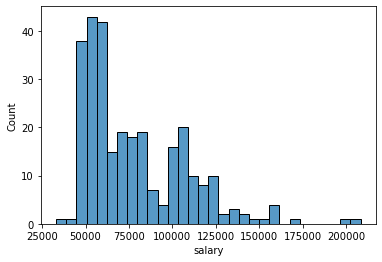

In [3]:
sns.histplot(data=df, x='salary', bins=30);

In [4]:
df.groupby('group')['salary'].agg(['size','mean', 'min', 'max'])

,size,mean,min,max
group,,,,
admin,71,57745.070423,33100,87400
consultant,216,85206.944444,46700,208300


In [5]:
df[(df['group']=='consultant')].groupby('gender')['salary'].agg(['size','mean', 'min', 'max'])

,size,mean,min,max
gender,,,,
F,103,82241.747573,46700,156700
M,113,87909.734513,50000,208300


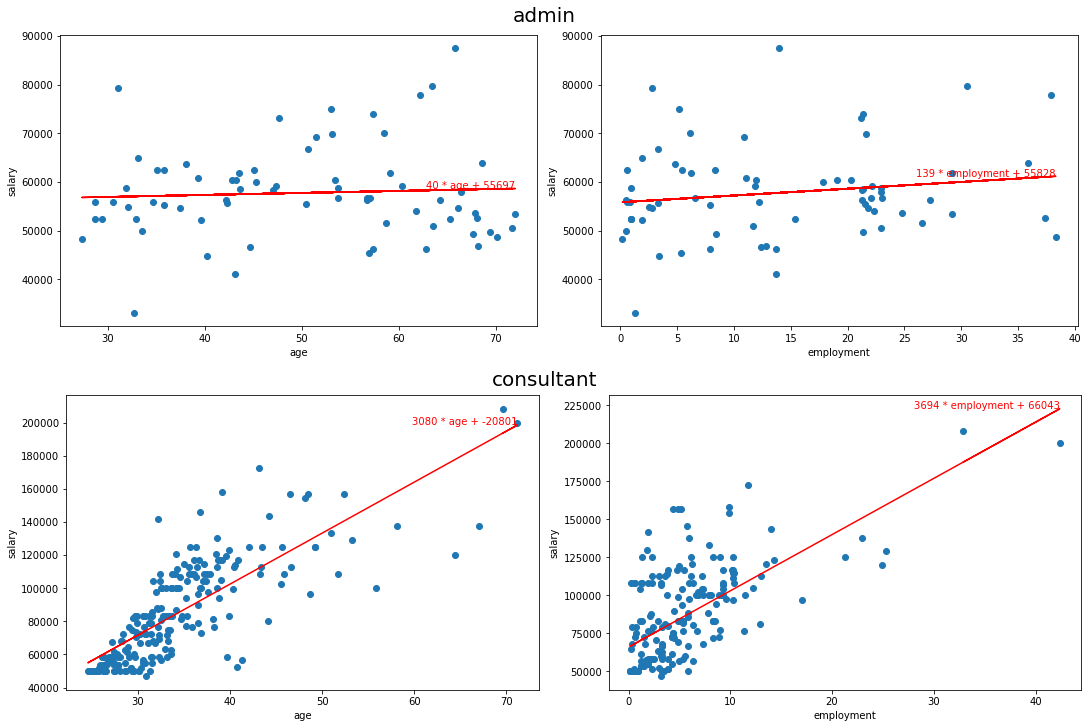

In [6]:
target='salary'
features = ['age','employment']
category = 'group'
groups = df[category].unique()
groups.sort()

ngroups = len(groups)
nfeatures = len(features)

fig = plt.figure(constrained_layout=True, figsize=(15, 5*ngroups))
#fig.suptitle(target)
subfigs = fig.subfigures(nrows=ngroups, ncols=1)
for row, subfig in enumerate(subfigs):
    group = groups[row]
    subfig.suptitle(group, fontsize=20)
    axs = subfig.subplots(nrows=1, ncols=nfeatures)
    for col, ax in enumerate(axs):
        feature = features[col]
        dfg = df[df[category]==group]
        X = dfg[[feature]]
        x = dfg[feature]
        y = dfg[target]

        lr = LinearRegression()
        lr.fit(X, y)
        a = lr.coef_[0]
        b = lr.intercept_
        
        ax.set_xlabel(feature)
        ax.set_ylabel(target)                
        ax.scatter(x, y)
        ax.plot(x, x*a+b, color='r')
        trend = '{} * {} + {}'.format(int(a), feature, int(b))
        ax.text(x.max(), x.max()*a+b, trend, horizontalalignment='right', color='r')